In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv

# importing files
filename = 'uploads/Pressao.csv'
pressao_df = pd.read_csv(filename, delimiter=';')
pressao_df = pressao_df.dropna(subset=['Prof./Intv.(m)', 'Pressão de Formação (Kgf/cm2)'])
pressao_df

,Corrida,Tipo,No.,Prof./Intv.(m),Cota (m),Pressão Hidrostatica (Kgf/cm2),Pressão de Formação (Kgf/cm2),Amostra?,Resultados
0,2,Pressão,1,663.8,-542.8,NaN,65.18,Não,Efetivo alta mobilidade
1,2,Pressão,2,642.2,-521.2,NaN,62.76,Não,Efetivo alta mobilidade
2,2,Pressão,3,748.0,-627.0,NaN,73.25,Não,Efetivo altíssima mobilidade
3,2,Pressão,4,767.8,-646.8,NaN,75.23,Não,Efetivo altíssima mobilidade
4,2,Pressão,5,857.6,-736.6,NaN,85.90,Não,Efetivo alta mobilidade
5,2,Pressão,6,891.2,-770.2,NaN,88.83,Não,Efetivo alta mobilidade
6,2,Pressão,7,1030.0,-909.0,NaN,104.60,Não,Efetivo alta mobilidade
7,2,Pressão,8,1097.4,-976.4,NaN,112.06,Não,Efetivo alta mobilidade
9,2,Pressão,10,1116.3,-995.3,NaN,114.24,Não,Efetivo com baixa mobilidade
10,2,Pressão,11,1249.0,-1128.0,NaN,128.79,Não,Efetivo alta mobilidade


In [104]:
filename = 'uploads/pressao_1_OGX_93_MA.csv'
pressao_ogx_93_ma = pd.read_csv(filename, delimiter=';')
pressao_ogx_93_ma = pressao_ogx_93_ma.dropna(subset=['Prof./Intv.(m)', 'Pressão de\nFormação\n(Kgf/cm2)'])

'Tipo'

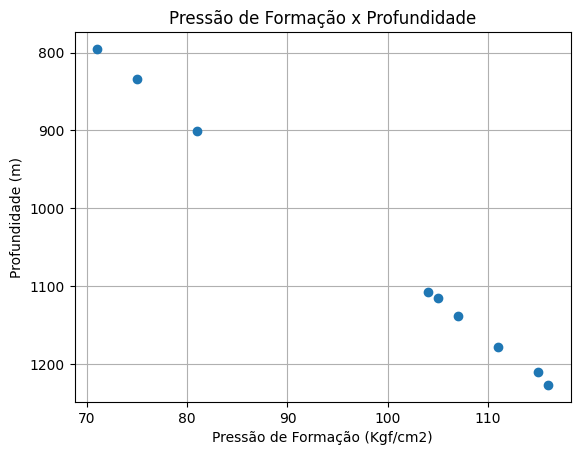

In [90]:
def plot_pressao(x, y, title, xlabel, ylabel):
    plt.plot(x, y, 'o')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

plot_pressao(x=pressao_df['Pressão de Formação (Kgf/cm2)'],
             y=pressao_df['Prof./Intv.(m)'],
             title='Pressão de Formação x Profundidade',
             xlabel='Pressão de Formação (Kgf/cm2)',
             ylabel='Profundidade (m)')

In [95]:
def inv_polynomial(dobs, degree, x):
    """
    Funcao para calcular os parâmetros de uma regressao polinomial
    Dados de entrada:
        d = dados observados
        degree = grau do polinomio
        x = valores das posicoes onde d foi medido, tem que ter a mesma dimensao de d

    Output:
        m = parametros
        G = matriz de modelagem direta
    """
    nl = max(np.shape(dobs))

    G = np.ones((nl,1))
    for pw in range(1,degree+1):

        G = np.c_[G, x**pw ]

    m = np.dot(np.dot(inv(np.dot(G.T,G)),G.T), dobs)

    return m, G

m, G = inv_polynomial(dobs=pressao_ogx_93_ma['Prof./Intv.(m)'], degree=1, x=pressao_ogx_93_ma['Pressão de\nFormação\n(Kgf/cm2)'])
print(f"y = {m[0]:.2f} + {m[1]:.2f}x")

y = 128.41874721554083 + 9.436193531141416x


In [96]:
# prof =-10.23 + 0.11*pressao_formacao
profundidade_calculada = m[0] + m[1]*pressao_ogx_93_ma['Pressão de\nFormação\n(Kgf/cm2)']
profundidade_calculada

1      798.388488
2      836.133262
3      892.750423
4     1109.782874
5     1119.219068
9     1138.091455
10    1175.836229
11    1213.581003
12    1223.017197
Name: Pressão de\nFormação\n(Kgf/cm2), dtype: float64

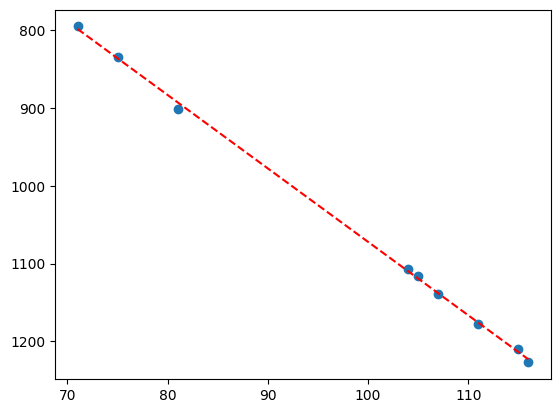

In [97]:
plt.plot(pressao_formacao, prof, 'o')
plt.plot(pressao_formacao, profundidade_calculada, '--r' )
plt.gca().invert_yaxis()